In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../../CSV/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
cat_col = ["sex","children","smoker","region"]

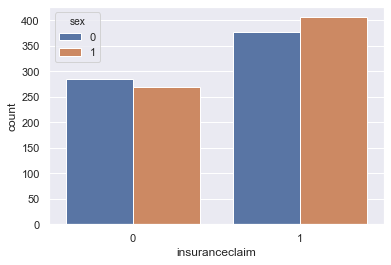

----------------------------------------------------


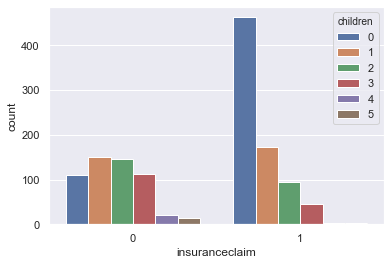

----------------------------------------------------


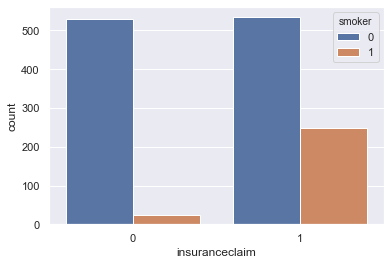

----------------------------------------------------


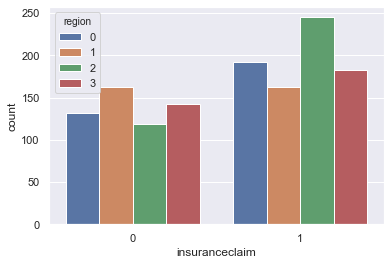

----------------------------------------------------


In [5]:
for col in cat_col:
    plt.figure()
    sns.countplot(data=df,x="insuranceclaim",hue=col)
    plt.show()
    print("----------------------------------------------------")

In [7]:
num_col = ["age","bmi","charges"]

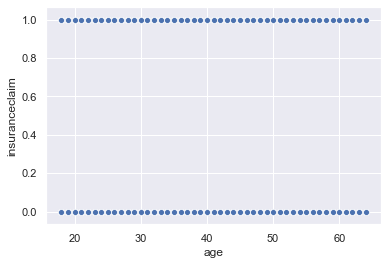

------------------------------------------------


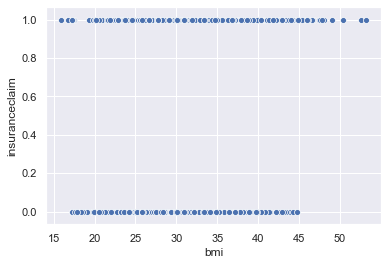

------------------------------------------------


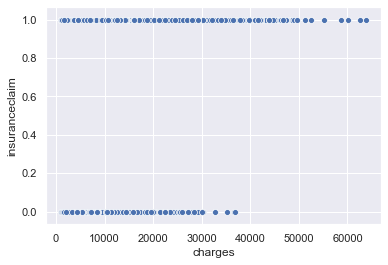

------------------------------------------------


In [8]:
for col in num_col:
    plt.figure()
    sns.scatterplot(data=df,x=col,y="insuranceclaim")
    plt.show()
    print("------------------------------------------------")

<p>sex and charges might less affect to target</p>

### Baseline model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
def train_model(X_train,X_test):
    log = LogisticRegression()
    log.fit(X_train,y_train)
    y_pred = log.predict(X_test)
    print(classification_report(y_test,y_pred))

In [178]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [43]:
train_model(X_train,X_test)

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       157
           1       0.83      0.87      0.85       245

    accuracy                           0.81       402
   macro avg       0.81      0.80      0.80       402
weighted avg       0.81      0.81      0.81       402



### Filter method

In [28]:
#chi2
from sklearn.feature_selection import chi2
# ANOVA
from sklearn.feature_selection import f_regression
# common function for both
from sklearn.feature_selection import SelectKBest

<p>Chi2 Test</p>

In [102]:
chi = SelectKBest(score_func=chi2, k=5)

In [103]:
X_train_chi = chi.fit_transform(X_train,y_train)

In [104]:
X_test_chi = chi.transform(X_test)

In [105]:
train_model(X_train_chi,X_test_chi)

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       157
           1       0.81      0.87      0.84       245

    accuracy                           0.80       402
   macro avg       0.79      0.78      0.78       402
weighted avg       0.80      0.80      0.80       402



In [106]:
chi.scores_

array([6.66570510e+01, 7.99951711e-01, 1.76723951e+02, 2.24760407e+02,
       8.97512391e+01, 1.90474694e+00, 1.05483865e+06])

In [107]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [108]:
chi.get_support()

array([ True, False,  True,  True,  True, False,  True])

<p>Anova Test</p>

In [109]:
anova = SelectKBest(score_func=f_regression, k=5)

In [110]:
X_train_f = anova.fit_transform(X_train,y_train)

In [111]:
X_test_f = anova.transform(X_test)

In [112]:
train_model(X_train_f,X_test_f)

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       157
           1       0.81      0.87      0.84       245

    accuracy                           0.80       402
   macro avg       0.79      0.78      0.78       402
weighted avg       0.80      0.80      0.80       402



In [113]:
anova.scores_

array([ 13.32163892,   1.63777909, 173.24700069, 201.75424875,
       128.32425002,   2.35830459, 104.5606801 ])

In [114]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [115]:
anova.get_support()

array([ True, False,  True,  True,  True, False,  True])

### Wrapper method

In [120]:
features = df.columns.tolist()[:-1]

In [121]:
features

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

<h5>Forward selection</h5>

In [141]:
cols = []
i = len(cols) + 1
for col in features:
    cols.append(col)
  
    X = df[cols]
    y = df["insuranceclaim"]
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    
    print("Iteration :",i, "  Columns :",cols)
    train_model(X_train,X_test)
    i += 1
    print("----------------------------------------------------------------------------------")
    

Iteration : 1   Columns : ['age']
              precision    recall  f1-score   support

           0       0.30      0.10      0.14       157
           1       0.60      0.86      0.70       245

    accuracy                           0.56       402
   macro avg       0.45      0.48      0.42       402
weighted avg       0.48      0.56      0.49       402

----------------------------------------------------------------------------------
Iteration : 2   Columns : ['age', 'sex']
              precision    recall  f1-score   support

           0       0.27      0.07      0.11       157
           1       0.60      0.88      0.71       245

    accuracy                           0.56       402
   macro avg       0.43      0.47      0.41       402
weighted avg       0.47      0.56      0.48       402

----------------------------------------------------------------------------------
Iteration : 3   Columns : ['age', 'sex', 'bmi']
              precision    recall  f1-score   support

  

<h5>Backward selection</h5>

In [161]:
features = df.columns.tolist()[:-1]
cols = []
cols.extend(features)
i = len(cols)
for col in features:
    
    X = df[cols]
    y = df["insuranceclaim"]
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    
    print("Iteration :",i, "  Columns :",cols)
    train_model(X_train,X_test)
    i -= 1
    cols.remove(col)
    print("----------------------------------------------------------------------------------")
    

Iteration : 7   Columns : ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       157
           1       0.83      0.87      0.85       245

    accuracy                           0.81       402
   macro avg       0.81      0.80      0.80       402
weighted avg       0.81      0.81      0.81       402

----------------------------------------------------------------------------------
Iteration : 6   Columns : ['sex', 'bmi', 'children', 'smoker', 'region', 'charges']
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       157
           1       0.79      0.88      0.83       245

    accuracy                           0.78       402
   macro avg       0.78      0.76      0.76       402
weighted avg       0.78      0.78      0.78       402

----------------------------------------------------------------------------------
Itera

### Pricipal Component Analysis (PCA)

In [171]:
from sklearn.decomposition import PCA

In [182]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [183]:
pca = PCA(n_components=5,random_state=1)

In [186]:
X_train_pca = pca.fit_transform(X_train,y_train)

In [189]:
X_test_pca = pca.transform(X_test)

In [191]:
train_model(X_train_pca,X_test_pca)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       157
           1       0.89      0.90      0.89       245

    accuracy                           0.87       402
   macro avg       0.86      0.86      0.86       402
weighted avg       0.87      0.87      0.87       402



In [198]:
pca.noise_variance_

0.14729543030261993

In [199]:
pc = pca.components_

In [201]:
pc[0]

array([ 3.47149728e-04,  2.02993643e-06,  9.76283845e-05,  3.28579817e-06,
        2.64211095e-05, -3.42637708e-07,  9.99999935e-01])

In [202]:
pc[1]

array([-9.99306837e-01,  3.96547954e-04, -3.63219499e-02, -6.54221995e-04,
        7.98074855e-03, -1.46982768e-03,  3.50245154e-04])

In [204]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')